# Analysis

In [457]:
import pandas as pd
import matplotlib.pyplot as plt


## 1. Loading Data

In [458]:
TechUseHigh_Sector_us = pd.read_csv('Data/TechUseHigh_Sector_us.csv')
TechUseHigh_Size_us = pd.read_csv('Data/TechUseHigh_Size_us.csv')
TechUseHigh_state = pd.read_csv('Data/TechUseHigh_state.csv')



## 2. Artificial Intelligence use by Firm Size
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Create a new column with the 'High Use' normalized to (total responses - don't know).


In [459]:
TechUseHigh_Size_us_HighUse = TechUseHigh_Size_us[TechUseHigh_Size_us['TECHUSE'] == 'T1E03B05']
TechUseHigh_Size_us_DontKnow = TechUseHigh_Size_us[TechUseHigh_Size_us['TECHUSE'] == 'T1E03B06']
TechUseHigh_Size_us_Total = TechUseHigh_Size_us[TechUseHigh_Size_us['TECHUSE'] == 'T1E03BA9']
# Reset all of the indices so the calculation works correctly
TechUseHigh_Size_us_HighUse.reset_index(drop=True, inplace=True)
TechUseHigh_Size_us_DontKnow.reset_index(drop=True, inplace=True)
TechUseHigh_Size_us_Total.reset_index(drop=True, inplace=True)
# Normalize high AI use to total non-don't-know responses
TechUseHigh_Size_us_HighUse['NORM_FIRMS'] = TechUseHigh_Size_us_HighUse['FIRMPDEMP']*100/(
    TechUseHigh_Size_us_Total['FIRMPDEMP'] - TechUseHigh_Size_us_DontKnow['FIRMPDEMP'])



C:\Users\Darrell\AppData\Local\Temp\ipykernel_34700\2618996743.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TechUseHigh_Size_us_HighUse['NORM_FIRMS'] = TechUseHigh_Size_us_HighUse['FIRMPDEMP']*100/(


### b. Do an exploratory plot of the high AI use by size of firms

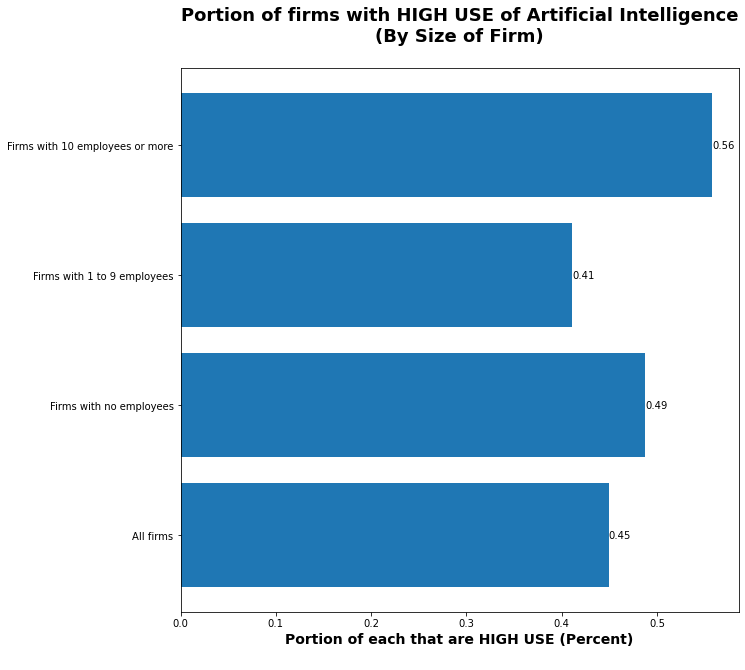

In [460]:
fig, ax = plt.subplots()
ax.barh(TechUseHigh_Size_us_HighUse['NSFSZFI_LABEL'], 
           TechUseHigh_Size_us_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n', fontsize = 14, fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n(By Size of Firm)\n',
             fontsize=18, fontweight='bold')
ax.bar_label(ax.containers[0], fmt='%.2f')
fig.set_figwidth(10)
fig.set_figheight(10)
plt.show()


## 3. Artificial Intelligence use by Sector
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Create a new column with the 'High Use' normalized to (total responses - don't know).

In [461]:
TechUseHigh_Sector_us_HighUse = TechUseHigh_Sector_us[
    TechUseHigh_Sector_us['TECHUSE'] == 'T1E03B05']
TechUseHigh_Sector_us_DontKnow = TechUseHigh_Sector_us[
    TechUseHigh_Sector_us['TECHUSE'] == 'T1E03B06']
TechUseHigh_Sector_us_Total = TechUseHigh_Sector_us[TechUseHigh_Sector_us['TECHUSE'] == 'T1E03BA9']
# Reset all of the indices so the calculation works correctly
TechUseHigh_Sector_us_HighUse.reset_index(drop=True, inplace=True)
TechUseHigh_Sector_us_DontKnow.reset_index(drop=True, inplace=True)
TechUseHigh_Sector_us_Total.reset_index(drop=True, inplace=True)
# Normalize high AI use to total non-don't-know responses
TechUseHigh_Sector_us_HighUse['NORM_FIRMS'] = TechUseHigh_Sector_us_HighUse['FIRMPDEMP']*100/(
    TechUseHigh_Sector_us_Total['FIRMPDEMP'] - TechUseHigh_Sector_us_DontKnow['FIRMPDEMP'])



C:\Users\Darrell\AppData\Local\Temp\ipykernel_34700\1940383100.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TechUseHigh_Sector_us_HighUse['NORM_FIRMS'] = TechUseHigh_Sector_us_HighUse['FIRMPDEMP']*100/(


### b. Do an exploratory plot of the high AI use by sector

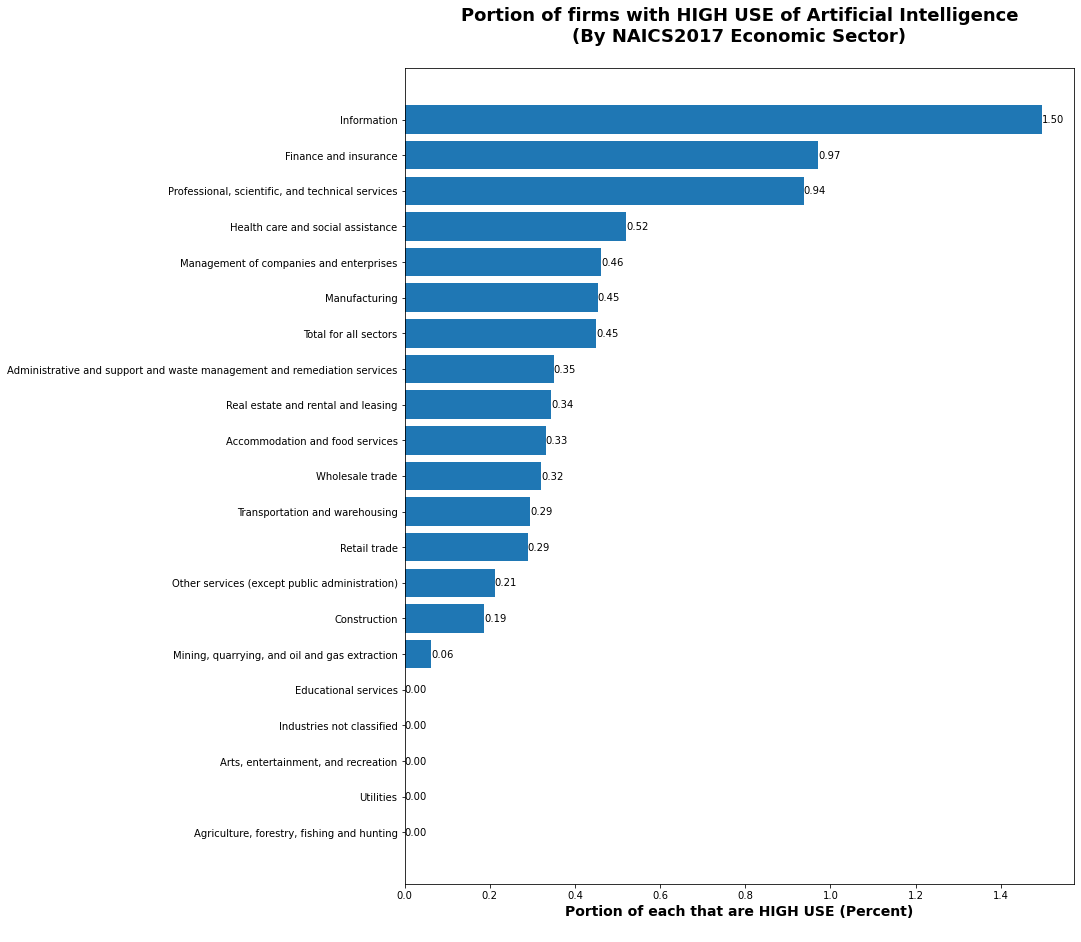

In [462]:
TechUseHigh_Sector_us_HighUse = TechUseHigh_Sector_us_HighUse.sort_values(
    by=['NORM_FIRMS'], ascending=True)
fig, ax = plt.subplots()
ax.barh(TechUseHigh_Sector_us_HighUse['NAICS2017_LABEL'],
        TechUseHigh_Sector_us_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n',
              fontsize=14, fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n(By NAICS2017 Economic Sector)\n',
             fontsize=18, fontweight='bold')
ax.bar_label(ax.containers[0], fmt='%.2f')
fig.set_figwidth(12)
fig.set_figheight(15)
plt.show()


## 4. Artificial Intelligence use by State
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Create a new column with the 'High Use' normalized to (total responses - don't know).

In [463]:
TechUseHigh_state_HighUse = TechUseHigh_state[
    TechUseHigh_state['TECHUSE'] == 'T1E03B05']
TechUseHigh_state_DontKnow = TechUseHigh_state[
    TechUseHigh_state['TECHUSE'] == 'T1E03B06']
TechUseHigh_state_Total = TechUseHigh_state[TechUseHigh_state['TECHUSE'] == 'T1E03BA9']
# Reset all of the indices so the calculation works correctly
TechUseHigh_state_HighUse.reset_index(drop=True, inplace=True)
TechUseHigh_state_DontKnow.reset_index(drop=True, inplace=True)
TechUseHigh_state_Total.reset_index(drop=True, inplace=True)
# Normalize high AI use to total non-don't-know responses
TechUseHigh_state_HighUse['NORM_FIRMS'] = TechUseHigh_state_HighUse['FIRMPDEMP']*100/(
    TechUseHigh_state_Total['FIRMPDEMP'] - TechUseHigh_state_DontKnow['FIRMPDEMP'])



C:\Users\Darrell\AppData\Local\Temp\ipykernel_34700\2832221959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TechUseHigh_state_HighUse['NORM_FIRMS'] = TechUseHigh_state_HighUse['FIRMPDEMP']*100/(


### b. Do an exploratory plot of the high AI use by state

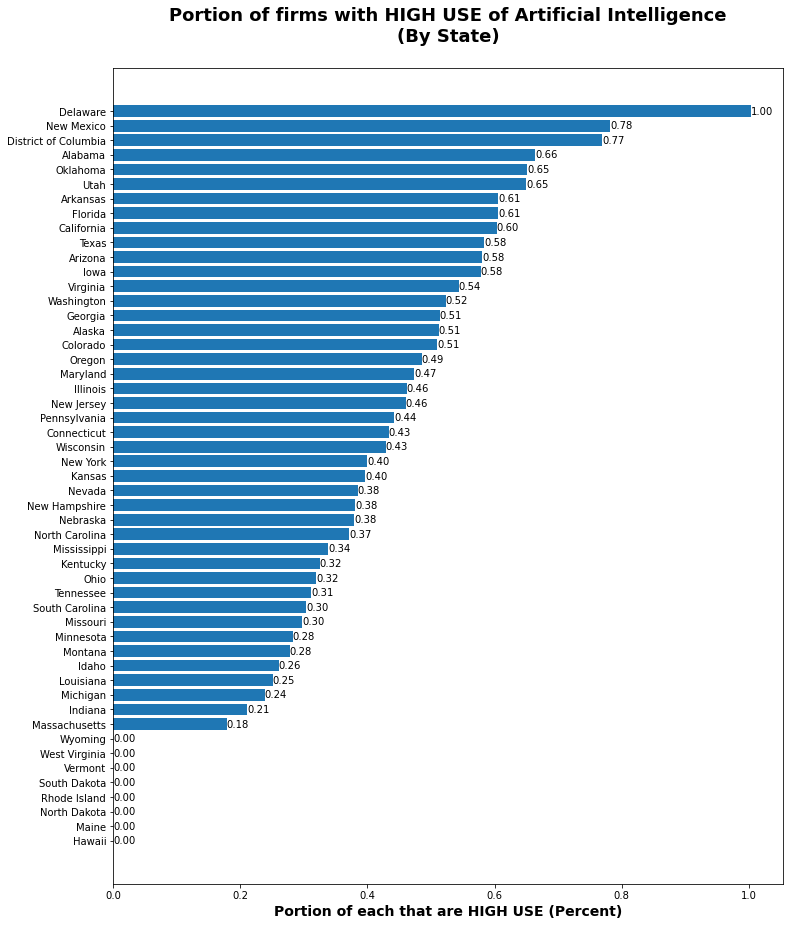

In [464]:
TechUseHigh_state_HighUse = TechUseHigh_state_HighUse.sort_values(
    by=['NORM_FIRMS', 'State'], ascending=True)
fig, ax = plt.subplots()
ax.barh(TechUseHigh_state_HighUse['State'],
        TechUseHigh_state_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n',
              fontsize=14, fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n(By State)\n',
             fontsize=18, fontweight='bold')
ax.bar_label(ax.containers[0], fmt='%.2f')
fig.set_figwidth(12)
fig.set_figheight(15)
plt.show()


### c. Do an hexbin map of the high AI use by state

Text(550, 50, '\nFirms were asked "..to what extent did \n             this business use [Artificial Intelligence]  \n             in production processes for goods or services?"   \n             Shown are the percentage of respondents who \n             answered HIGH USE')

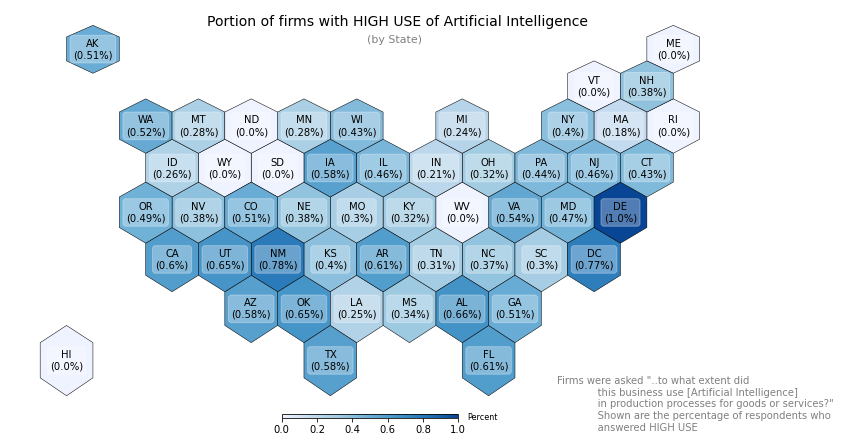

In [465]:
# Import geopandas library
import geopandas as gpd

# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)
# Set the plot size for this notebook:
plt.rcParams["figure.figsize"] = 13, 13

# add a "centroid" column with the centroid position of each county
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# join our data to the geoData set
geoData.rename(columns={'iso3166_2': 'StateCode'}, inplace=True)
geoDatamerged = geoData.merge(TechUseHigh_state_HighUse, how='inner', on='StateCode')

from palettable.colorbrewer.sequential import Blues_7
fig,ax = plt.subplots(1, figsize=(13,13))
# plt.suptitle("Portion of firms with HIGH USE of Artificial Intelligence")
geoDatamerged.plot(ax=ax, 
                   column='NORM_FIRMS', 
                   cmap=Blues_7.mpl_colormap,
                   #norm=plt.Normalize(vmin=2, vmax=13),
                   edgecolor='black',
                   linewidth=0.5)
ax.axis('off')
bbox_props = dict(boxstyle="round", fc="w", ec="1", alpha=0.3)
for idx, row in geoDatamerged.iterrows():
    statetext = f"{row['StateCode']}\n({round(row['NORM_FIRMS'], 2)}%)"
    ax.annotate(
        text=statetext, bbox = bbox_props,
        xy=row['centroid'].coords[0],
        horizontalalignment='center',
        va='center',
        color="black"
    )
sm = plt.cm.ScalarMappable(cmap=Blues_7.mpl_colormap)
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0)
# Add title, subtitle and author
ax.annotate('Portion of firms with HIGH USE of Artificial Intelligence', xy=(200, 400),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate('(by State)', xy=(360, 380),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=11, color='#808080')
ax.annotate('Percent', xy=(460, 2),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=8, color='black')

## Annotate an explanation of what is being shown in
ax.annotate(text='\nFirms were asked "..to what extent did \n \
            this business use [Artificial Intelligence]  \n \
            in production processes for goods or services?"   \n \
            Shown are the percentage of respondents who \n \
            answered HIGH USE', xy=(550, 50),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#808080')


## 5. Artificial Intelligence use by Region
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Group each by Region and sum
3. Create a new column with the 'High Use' normalized to (total responses - don't know).

In [466]:

# Get the sum of the counts over the regions
TechUseHigh_region_HighUse = pd.DataFrame(TechUseHigh_state_HighUse.groupby('Region')[
    'FIRMPDEMP'].sum())
TechUseHigh_region_DontKnow = pd.DataFrame(TechUseHigh_state_DontKnow.groupby('Region')[
    'FIRMPDEMP'].sum())
TechUseHigh_region_Total=pd.DataFrame(TechUseHigh_state_Total.groupby('Region')[
    'FIRMPDEMP'].sum())

# Normalize high AI use to total non-don't-know responses
TechUseHigh_region_HighUse['NORM_FIRMS'] = TechUseHigh_region_HighUse['FIRMPDEMP']*100/(
    TechUseHigh_region_Total['FIRMPDEMP'] - TechUseHigh_region_DontKnow['FIRMPDEMP'])
TechUseHigh_region_HighUse.reset_index(drop=False, inplace=True)



### b. Do an exploratory plot of the high AI use by region.

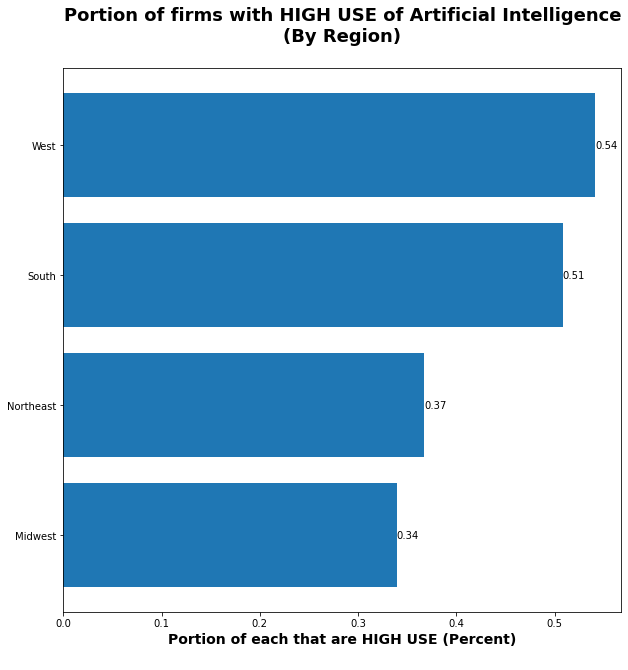

In [467]:
TechUseHigh_region_HighUse = TechUseHigh_region_HighUse.sort_values(
    by=['NORM_FIRMS', 'Region'], ascending=True)
fig, ax = plt.subplots()
ax.barh(TechUseHigh_region_HighUse['Region'],
        TechUseHigh_region_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n',
              fontsize=14, fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n(By Region)\n',
             fontsize=18, fontweight='bold')
ax.bar_label(ax.containers[0], fmt='%.2f')
fig.set_figwidth(10)
fig.set_figheight(10)
plt.show()


### c. Do a plot of the states with just the regional value plotted
1. Merge the regional dataframe back into the state dateframe to give a column of the the normalized regional value for each state
2. Plot the states again but use the normalized regional value for each.

In [468]:
TechUseHigh_state_HighUse = TechUseHigh_state_HighUse.merge(
    TechUseHigh_region_HighUse, how='inner', on='Region')

TechUseHigh_state_HighUse.rename(columns={'NORM_FIRMS_x': 'NORM_FIRMS_STATE', 'NORM_FIRMS_y': 'NORM_FIRMS_REGION'}, inplace=True)

Text(550, 50, 'Firms were asked "..to what extent did \n             this business use [Artificial Intelligence]  \n             in production processes for goods or services?"   \n             Shown are the percentage of respondents who \n             answered HIGH USE')

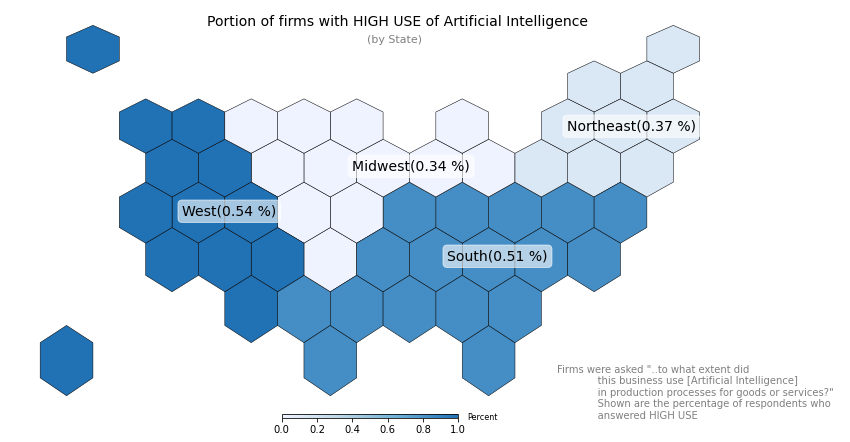

In [469]:
# join our data to the geoData set
geoDatamerged = geoData.merge(
    TechUseHigh_state_HighUse, how='inner', on='StateCode')


from palettable.colorbrewer.sequential import Blues_4

fig,ax = plt.subplots(1, figsize=(13,13))
geoDatamerged.plot(ax=ax, 
                   column='NORM_FIRMS_REGION',
                   cmap=Blues_4.mpl_colormap,
                   #norm=plt.Normalize(vmin=2, vmax=13),
                   edgecolor='black',
                   linewidth=0.5)
ax.axis('off')
# Annotate the regions
bbox_props = dict(boxstyle="round", fc="w", ec="1", alpha=0.6)
ax.annotate(text=f"West({round(TechUseHigh_region_HighUse[TechUseHigh_region_HighUse['Region']  == 'West']['NORM_FIRMS'].item(), 2)} %)",
            xy=(175, 210), xycoords='axes pixels', bbox=bbox_props,
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate(text=f"Northeast({round(TechUseHigh_region_HighUse[TechUseHigh_region_HighUse['Region']  == 'Northeast']['NORM_FIRMS'].item(), 2)} %)", 
            xy=(560, 295), xycoords='axes pixels', bbox=bbox_props,
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate(text=f"Midwest({round(TechUseHigh_region_HighUse[TechUseHigh_region_HighUse['Region']  == 'Midwest']['NORM_FIRMS'].item(), 2)} %)", 
            xy=(345, 255), xycoords='axes pixels', bbox=bbox_props,
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate(text=f"South({round(TechUseHigh_region_HighUse[TechUseHigh_region_HighUse['Region']  == 'South']['NORM_FIRMS'].item(), 2)} %)", 
            xy=(440, 165), xycoords='axes pixels', bbox=bbox_props,
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')

sm = plt.cm.ScalarMappable(cmap=Blues_4.mpl_colormap)
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0)
# Add title, subtitle and author
ax.annotate(text='Portion of firms with HIGH USE of Artificial Intelligence', xy=(200, 400),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate(text='(by State)', xy=(360, 380),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=11, color='#808080')
ax.annotate(text='Percent', xy=(460, 2),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=8, color='black')
## Annotate an explanation of what is being shown in
ax.annotate(text='Firms were asked "..to what extent did \n \
            this business use [Artificial Intelligence]  \n \
            in production processes for goods or services?"   \n \
            Shown are the percentage of respondents who \n \
            answered HIGH USE', xy=(550, 50),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=10, color='#808080')


## 6. Artificial Intelligence use by Sub-Region
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Group each by Division and sum
3. Create a new column with the 'High Use' normalized to (total responses - don't know).

In [470]:

# Get the sum of the counts over the divisions
TechUseHigh_subregion_HighUse = pd.DataFrame(
    TechUseHigh_state_HighUse.groupby('Division')['FIRMPDEMP_x'].sum())
TechUseHigh_subregion_DontKnow = pd.DataFrame(
    TechUseHigh_state_DontKnow.groupby('Division')['FIRMPDEMP'].sum())
TechUseHigh_subregion_Total = pd.DataFrame(
    TechUseHigh_state_Total.groupby('Division')['FIRMPDEMP'].sum())

# Normalize high AI use to total non-don't-know responses
TechUseHigh_subregion_HighUse['NORM_FIRMS'] = TechUseHigh_subregion_HighUse['FIRMPDEMP_x']*100/(
    TechUseHigh_subregion_Total['FIRMPDEMP'] - TechUseHigh_subregion_DontKnow['FIRMPDEMP'])
TechUseHigh_subregion_HighUse.reset_index(drop=False, inplace=True)



### b. Do an exploratory plot of the high AI use by region.

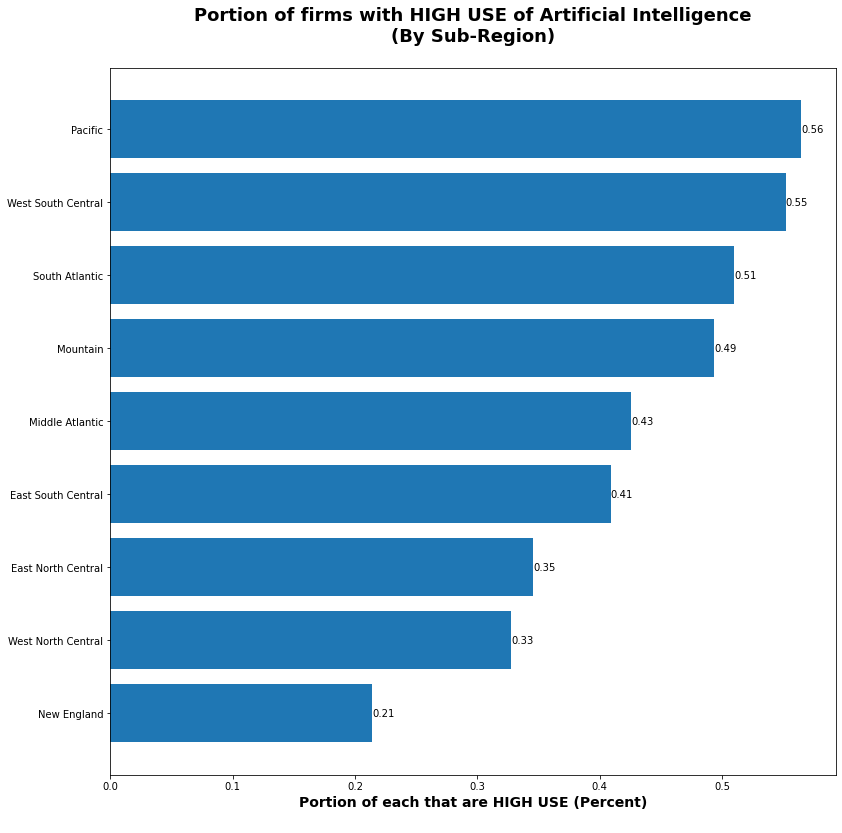

In [471]:
TechUseHigh_subregion_HighUse = TechUseHigh_subregion_HighUse.sort_values(
    by=['NORM_FIRMS', 'Division'], ascending=True)
fig, ax = plt.subplots()
ax.barh(TechUseHigh_subregion_HighUse['Division'],
        TechUseHigh_subregion_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n',
              fontsize=14, fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n(By Sub-Region)\n',
             fontsize=18, fontweight='bold')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.show()
